In [1]:
import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SequentialFeatureSelector
import matplotlib.pyplot as plt

data = pd.read_csv("Sampled_Unfollow_Full_Dataset.csv")
data = data[data.week != 5]
data.week.unique()

/tmp/ipykernel_43502/1411572154.py:14: DtypeWarning: Columns (142,143,147,150,152,162) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Sampled_Unfollow_Full_Dataset.csv")


array([ 2,  3,  4,  6,  8,  9, 10, 15,  7, 11, 12, 13, 14])

In [2]:
for col in data:
    print(data[f'{col}'].isnull().sum(), col)

0 Unnamed: 0.2
0 Unnamed: 0
53710 Unnamed: 0.1
0 degree_centrality mention u
0 u
0 eigenvector_centrality mention u
0 betweenness_centrality mention u
0 hubs mention u
0 authorities mention u
0 pagerank mention u
0 f
0 Out_Degree f
0 In_Degree f
0 PageRank f
0 Between_Centrality f
0 clustering f
0 Eigen_Centrality f
0 Degree_Centrality f
0 Out_Degree u
0 In_Degree u
0 PageRank u
0 Between_Centrality u
0 clustering u
0 Eigen_Centrality u
0 Degree_Centrality u
0 0 f
0 1 f
0 2 f
0 3 f
0 4 f
0 5 f
0 6 f
0 7 f
0 8 f
0 9 f
0 10 f
0 11 f
0 12 f
0 13 f
0 14 f
0 15 f
0 16 f
0 17 f
0 18 f
0 19 f
0 20 f
0 21 f
0 22 f
0 23 f
0 24 f
0 25 f
0 26 f
0 27 f
0 28 f
0 29 f
0 30 f
0 31 f
0 32 f
0 33 f
0 34 f
0 35 f
0 36 f
0 37 f
0 38 f
0 39 f
0 40 f
0 41 f
0 42 f
0 43 f
0 44 f
0 45 f
0 46 f
0 47 f
0 48 f
0 49 f
0 week
0 unfollow
0 No following f
0 No followers f
0 ratio reciprocity f
0 follower/followee f
0 ratio follow back f
0 No new follower f
0 No lost follower f
0 No new following f
0 No lost followi

In [3]:
drop_cols = ['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'u', 'f', 
             'week', 'unfollow', 'Unnamed: 0.2', 'polarity f', 'polarity u', 
             'description f', 'description u', 'tweet u', 'tweet f', 'verified f',
             'hashtags f','words_count u', 'hashtags u', '48 f', '47 f',
             'bio similarity', 'favourites count f','listed count f', 'statuses count f',
             'words_count f', 'subjectivity f', 'subjectivity u', 'statuses count u', 
             'listed count u', 'favourites count u', 'profile_image_url_https f']

for col in data.drop(drop_cols, axis = 1):
    print(data[f'{col}'].isnull().sum(), col)

0 degree_centrality mention u
0 eigenvector_centrality mention u
0 betweenness_centrality mention u
0 hubs mention u
0 authorities mention u
0 pagerank mention u
0 Out_Degree f
0 In_Degree f
0 PageRank f
0 Between_Centrality f
0 clustering f
0 Eigen_Centrality f
0 Degree_Centrality f
0 Out_Degree u
0 In_Degree u
0 PageRank u
0 Between_Centrality u
0 clustering u
0 Eigen_Centrality u
0 Degree_Centrality u
0 0 f
0 1 f
0 2 f
0 3 f
0 4 f
0 5 f
0 6 f
0 7 f
0 8 f
0 9 f
0 10 f
0 11 f
0 12 f
0 13 f
0 14 f
0 15 f
0 16 f
0 17 f
0 18 f
0 19 f
0 20 f
0 21 f
0 22 f
0 23 f
0 24 f
0 25 f
0 26 f
0 27 f
0 28 f
0 29 f
0 30 f
0 31 f
0 32 f
0 33 f
0 34 f
0 35 f
0 36 f
0 37 f
0 38 f
0 39 f
0 40 f
0 41 f
0 42 f
0 43 f
0 44 f
0 45 f
0 46 f
0 49 f
0 No following f
0 No followers f
0 ratio reciprocity f
0 follower/followee f
0 ratio follow back f
0 No new follower f
0 No lost follower f
0 No new following f
0 No lost following f
0 No following u
0 No followers u
0 ratio reciprocity u
0 follower/followee u
0 ra

In [4]:
data.shape

(280895, 170)

In [5]:
test_data = data[data.week == 15]
train_data = data[data.week <= 14]

X_train = train_data.drop(drop_cols, axis = 1).to_numpy()
y_train = train_data.unfollow.to_numpy()
X_test = test_data.drop(drop_cols, axis = 1).to_numpy()
y_test = test_data.unfollow.to_numpy()

## Code for saving dataset

In [ ]:
# df_drop_cols = ['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.2', 'polarity f', 'polarity u', 
#              'description f', 'description u', 'tweet u', 'tweet f', 'verified f',
#              'hashtags f','words_count u', 'hashtags u', '48 f', '47 f',
#              'bio similarity', 'favourites count f','listed count f', 'statuses count f',
#              'words_count f', 'subjectivity f', 'subjectivity u', 'statuses count u', 
#              'listed count u', 'favourites count u', 'profile_image_url_https f']
# final_df = data.drop(df_drop_cols, axis = 1)
# final_df.to_csv("Final_Dataset.csv")

In [ ]:
# final_df

## Random Forest
{'min_samples_split': 5, 'min_samples_leaf': 1, 'max_leaf_nodes': 350, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'log_loss', 'ccp_alpha': 0}

In [6]:
clf = RandomForestClassifier(n_jobs=-1, random_state=42, class_weight='balanced', min_samples_split=5,
                            min_samples_leaf=1, max_leaf_nodes=350, max_features='sqrt', max_depth=None,
                            criterion='log_loss', ccp_alpha=0)  
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("ACCURACY OF THE MODEL: ", accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.7984112435074855


### Hyperparameter Tuning

In [8]:
# rf = RandomForestClassifier(n_jobs=-1, random_state=42, class_weight='balanced') 

# params = dict(criterion =         ['gini', 'entropy', 'log_loss'], 
#               min_samples_split = [2, 5, 15],
#               max_leaf_nodes =    [31, 150, 350],
#               max_depth =         [2, 4, 6, 8, None],
#               min_samples_leaf =  [1, 3, 5, 15],
#               max_features =      ['sqrt', 'log2'],
#               ccp_alpha =         [0, .001, .01, .1])
# clf = RandomizedSearchCV(rf, params, n_iter=25, random_state=0, verbose=2)
# search = clf.fit(X_train, y_train)
# print(search.best_params_)

In [83]:
# rf = RandomForestClassifier(n_jobs=-1, random_state=42, class_weight='balanced', 
#                                  min_samples_split = search.best_params_['min_samples_split'],
#                                  min_samples_leaf = search.best_params_['min_samples_leaf'],
#                                  max_leaf_nodes = search.best_params_['max_leaf_nodes'],
#                                  max_features = search.best_params_['max_features'],
#                                  max_depth = search.best_params_['max_depth'],
#                                  criterion = search.best_params_['criterion'],
#                                  ccp_alpha = search.best_params_['ccp_alpha']).fit(X_train, y_train)

# y_pred = rf.predict(X_test)
# print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.7984112435074855


### Model Results

In [7]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)
print(confusion_matrix(y_test, y_pred))

12217 875 2424 849
[[12217   875]
 [ 2424   849]]


In [11]:
%%time
rf_importances = permutation_importance(clf, X_train, y_train, n_repeats=10, random_state=42)

CPU times: user 2h 38min 32s, sys: 17.6 s, total: 2h 38min 50s
Wall time: 31min 17s


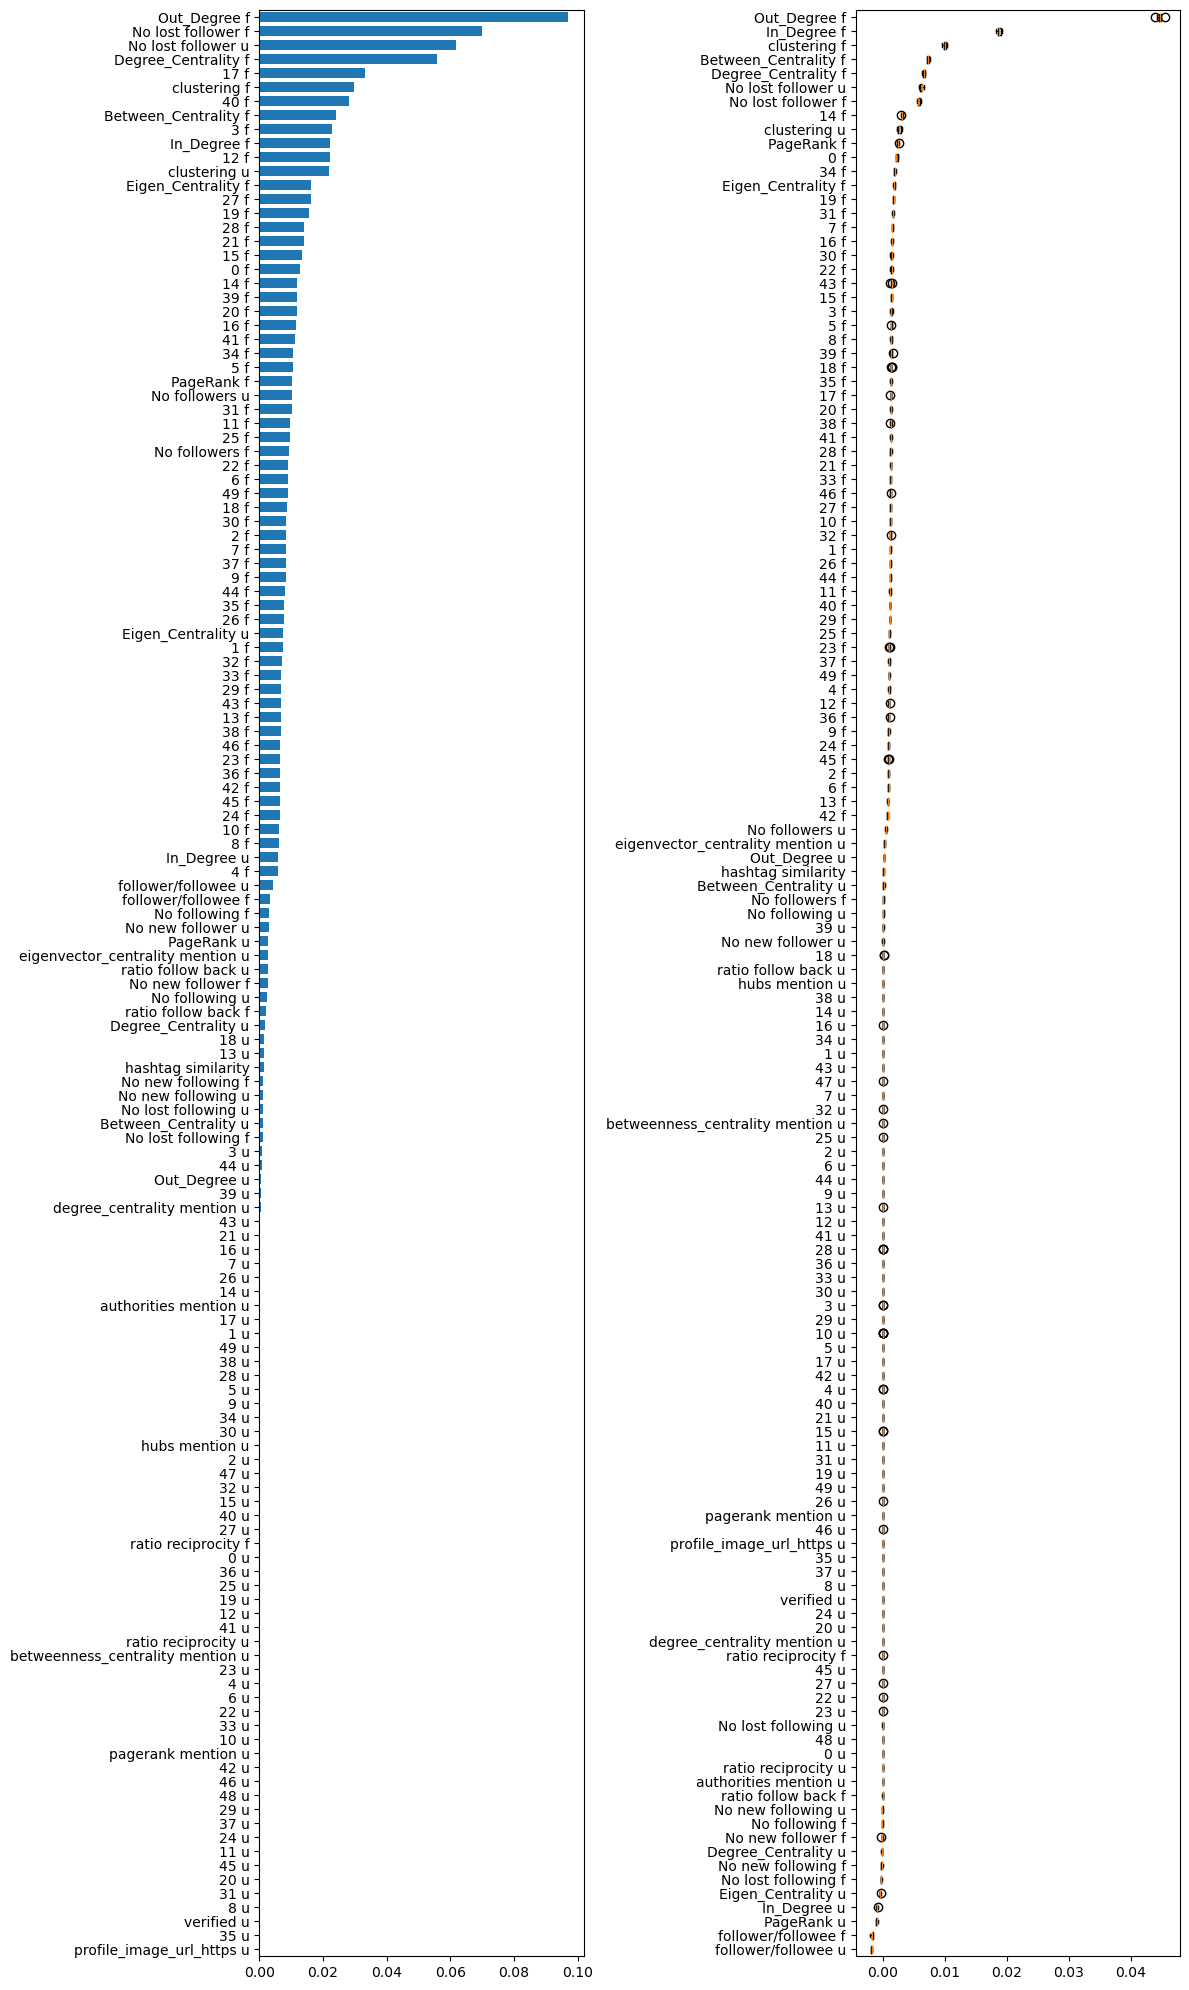

In [15]:
perm_sorted_idx = rf_importances.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 20))
ax1.barh(tree_indices, clf.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticks(tree_indices)
ax1.set_yticklabels(train_data.drop(drop_cols, axis = 1).columns[tree_importance_sorted_idx])
ax1.set_ylim((0, len(clf.feature_importances_)))
ax2.boxplot(
    rf_importances.importances[perm_sorted_idx].T,
    vert=False,
    labels=train_data.drop(drop_cols, axis = 1).columns[perm_sorted_idx],
)
fig.tight_layout()
plt.savefig("Figures/RF_var_imp.png")
plt.show()

## Logistic Regression

In [ ]:
# sfs_selector = SequentialFeatureSelector(estimator=LogisticRegression(max_iter=1000, n_jobs=-1), n_features_to_select = 10, cv =5, direction ='backward')
# sfs_selector.fit(X_train, y_train)
# X.columns[sfs_selector.get_support()]

In [12]:
clf = LogisticRegression(n_jobs=-1, random_state=42, class_weight='balanced', max_iter=100).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.7577146348915368


/home/TomKerby/miniconda3/envs/unfollow/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
ind = np.argpartition(clf.coef_[0], -10)[-10:]
clf.coef_[0][ind]
for i in range(len(ind)):
    print(ind[i], clf.coef_[0][ind[i]], train_data.drop(drop_cols, axis = 1).columns[ind[i]])

114 0.0005745468038447143 28 u
104 0.0006714505810030579 18 u
74 0.018637635748593125 No lost follower f
71 0.0018926506768457976 follower/followee f
25 0.0007054134973295859 5 f
83 0.018637635748593125 No lost follower u
72 0.0043821288977790585 ratio follow back f
81 0.0043821288977790585 ratio follow back u
80 0.0018926506768457976 follower/followee u
31 0.0007165985266743296 11 f


In [13]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
# print(tn, fp, fn, tp)
print(confusion_matrix(y_test, y_pred))

[[11970  1122]
 [ 2843   430]]


In [10]:
%%time
lr_importances = permutation_importance(clf, X_train, y_train, n_repeats=10, random_state=42)

CPU times: user 48min 36s, sys: 1h 3min 55s, total: 1h 52min 31s
Wall time: 31min 58s


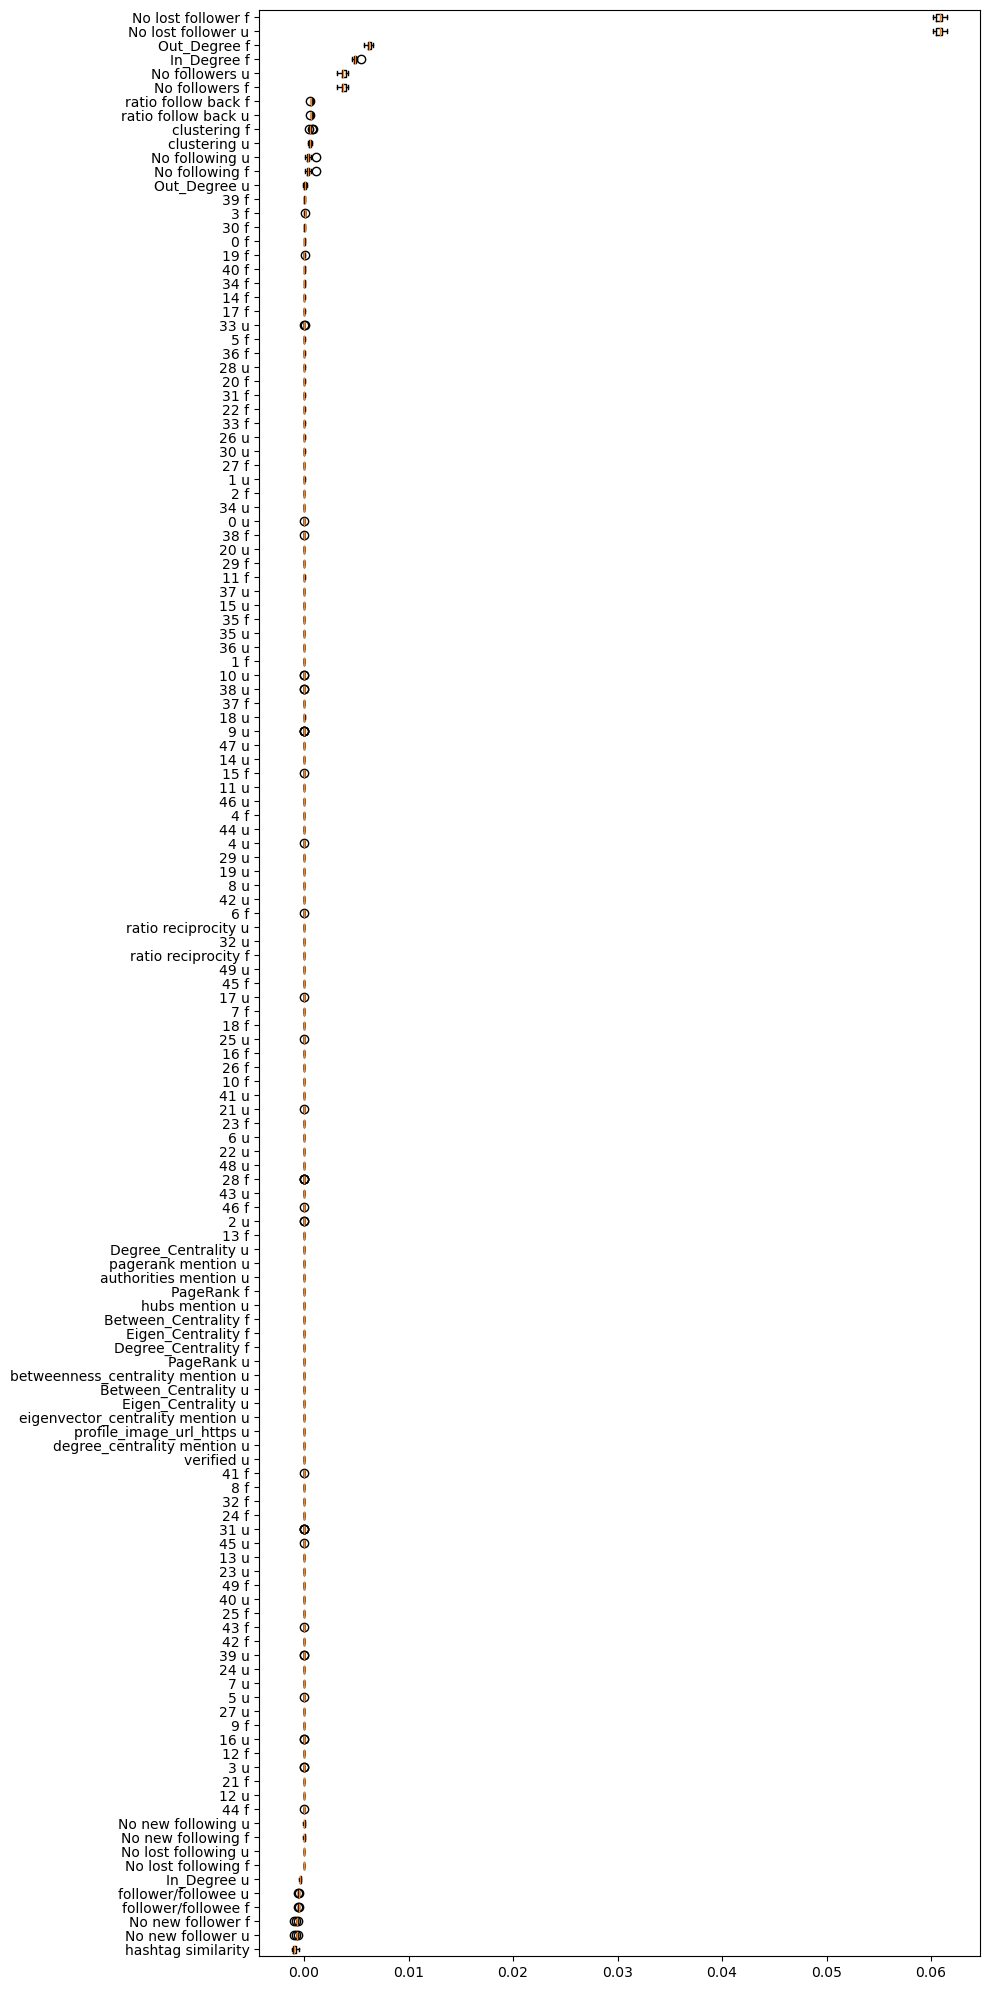

In [17]:
perm_sorted_idx = lr_importances.importances_mean.argsort()

fig, ax1 = plt.subplots(1, 1, figsize=(10, 20))

ax1.boxplot(
    lr_importances.importances[perm_sorted_idx].T,
    vert=False,
    labels=train_data.drop(drop_cols, axis = 1).columns[perm_sorted_idx],
)
fig.tight_layout()
plt.savefig("Figures/LR_var_imp.png")
plt.show()

## Histogram Gradient Boosting Machine

In [15]:
cat_feat = data.drop(drop_cols, axis=1).columns == "verified u"
histGBM = HistGradientBoostingClassifier(random_state=42, 
                                         class_weight='balanced', 
                                         categorical_features = cat_feat,
                                         learning_rate = .075,
                                         max_leaf_nodes = 25,
                                         min_samples_leaf = 20,
                                         max_iter=500).fit(X_train, y_train)
y_pred = histGBM.predict(X_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.8030553009471433


### Hyper-Parameter Tuning
* 1.) {'min_samples_leaf': 40, 'max_leaf_nodes': 100, 'max_depth': None, 'loss': 'log_loss', 'learning_rate': 0.1, 'l2_regularization': 0}
* 2.) {'min_samples_leaf': 25, 'max_leaf_nodes': 200, 'max_depth': None, 'loss': 'log_loss', 'learning_rate': 0.2, 'l2_regularization': 0}
* 3.) {'min_samples_leaf': 25, 'max_leaf_nodes': 350, 'max_depth': None, 'loss': 'log_loss', 'learning_rate': 0.15, 'l2_regularization': 0}\

Accuracy is going up each time but it is doing worse on unfollowing.

In [14]:
# histGBM = HistGradientBoostingClassifier(random_state=42, 
#                                          class_weight='balanced', 
#                                          categorical_features = cat_feat)

# params = dict(loss =              ['log_loss'], 
#               learning_rate =     [.1, .15, .2],
#               max_leaf_nodes =    [31, 150, 350],
#               max_depth =         [6, 8, None],
#               min_samples_leaf =  [25, 40, 55],
#               l2_regularization = [0, .001])
# clf = RandomizedSearchCV(histGBM, params, n_iter=25, random_state=0, verbose=2)
# search = clf.fit(X_train, y_train)
# print(search.best_params_)

# # y_pred = clf.predict(X_test)
# # print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

In [8]:
# histGBM = HistGradientBoostingClassifier(random_state=42, 
#                                          class_weight='balanced', 
#                                          categorical_features = cat_feat,
#                                          learning_rate = search.best_params_['learning_rate'],
#                                          max_leaf_nodes = search.best_params_['max_leaf_nodes'],
#                                          min_samples_leaf = search.best_params_['min_samples_leaf']).fit(X_train, y_train)
#                                          max_iter=500).fit(X_train, y_train)
# y_pred = histGBM.predict(X_test)
# print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.8030553009471433


In [16]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
# print(tn, fp, fn, tp)
print(confusion_matrix(y_test, y_pred))

[[11736  1356]
 [ 1867  1406]]


In [11]:
%%time
histGMB_importances = permutation_importance(histGBM, X_train, y_train, n_repeats=10, random_state=42)

CPU times: user 13h 44min 45s, sys: 4.37 s, total: 13h 44min 50s
Wall time: 48min 26s


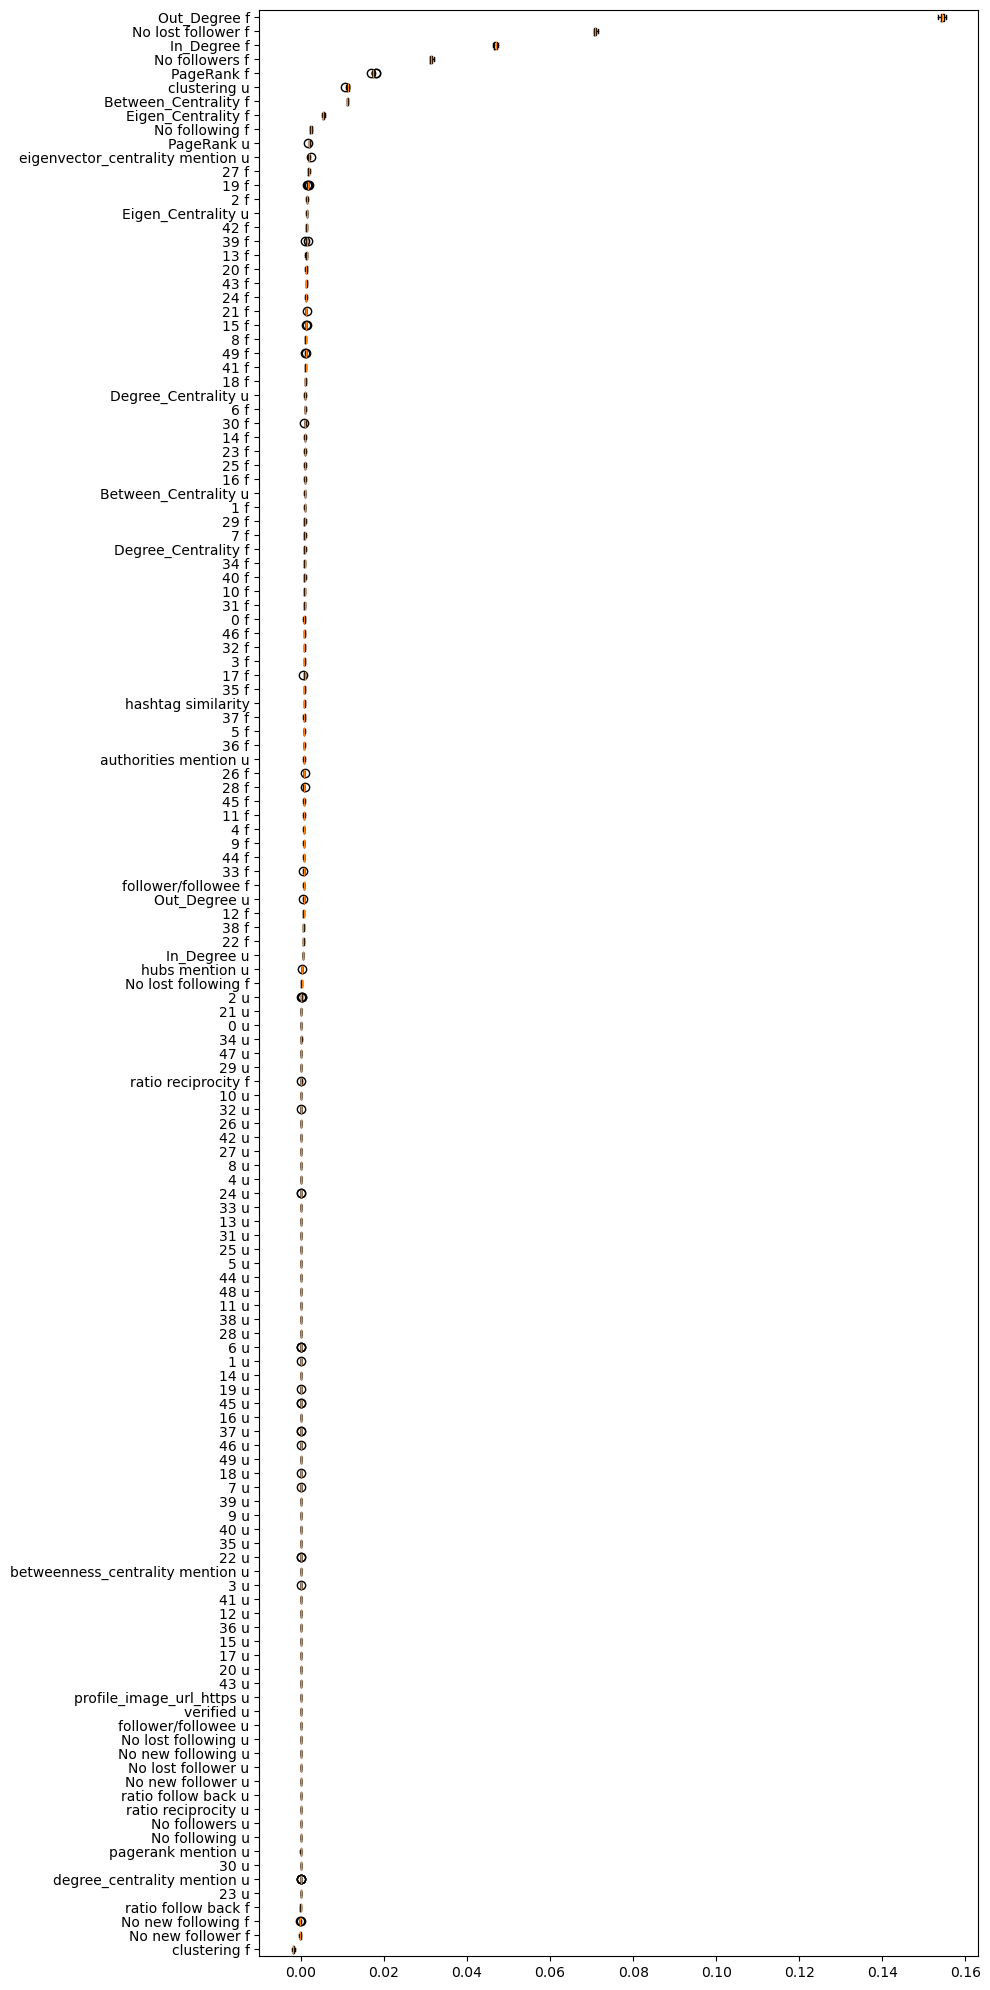

In [14]:
perm_sorted_idx = histGMB_importances.importances_mean.argsort()

fig, ax1 = plt.subplots(1, 1, figsize=(10, 20))

ax1.boxplot(
    histGMB_importances.importances[perm_sorted_idx].T,
    vert=False,
    labels=train_data.drop(drop_cols, axis = 1).columns[perm_sorted_idx],
)
fig.tight_layout()
plt.savefig("Figures/HistGBM_var_imp.png")
plt.show()